In [1]:
import numpy as np
import pandas as pd
low_memory=False
dataset=pd.read_csv('preprocessed.csv',encoding='cp1252')

In [2]:
##Number of rows and attributes

In [10]:
dataset.shape

(396161, 9)

In [4]:
##missing values

In [5]:
dataset.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [6]:
##Checking for outliers

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
c = ['so2','no2','rspm','spm','pm2_5']
plt.figure(figsize=(10,5))
for i in range(0,len(c)):
    plt.subplot(5,1,i+1)
    sns.boxplot(dataset[c[i]],color='green',fliersize=5,orient='h')
    plt.tight_layout()

In [16]:
##All the feature columns have outliers

In [ ]:
#barplot

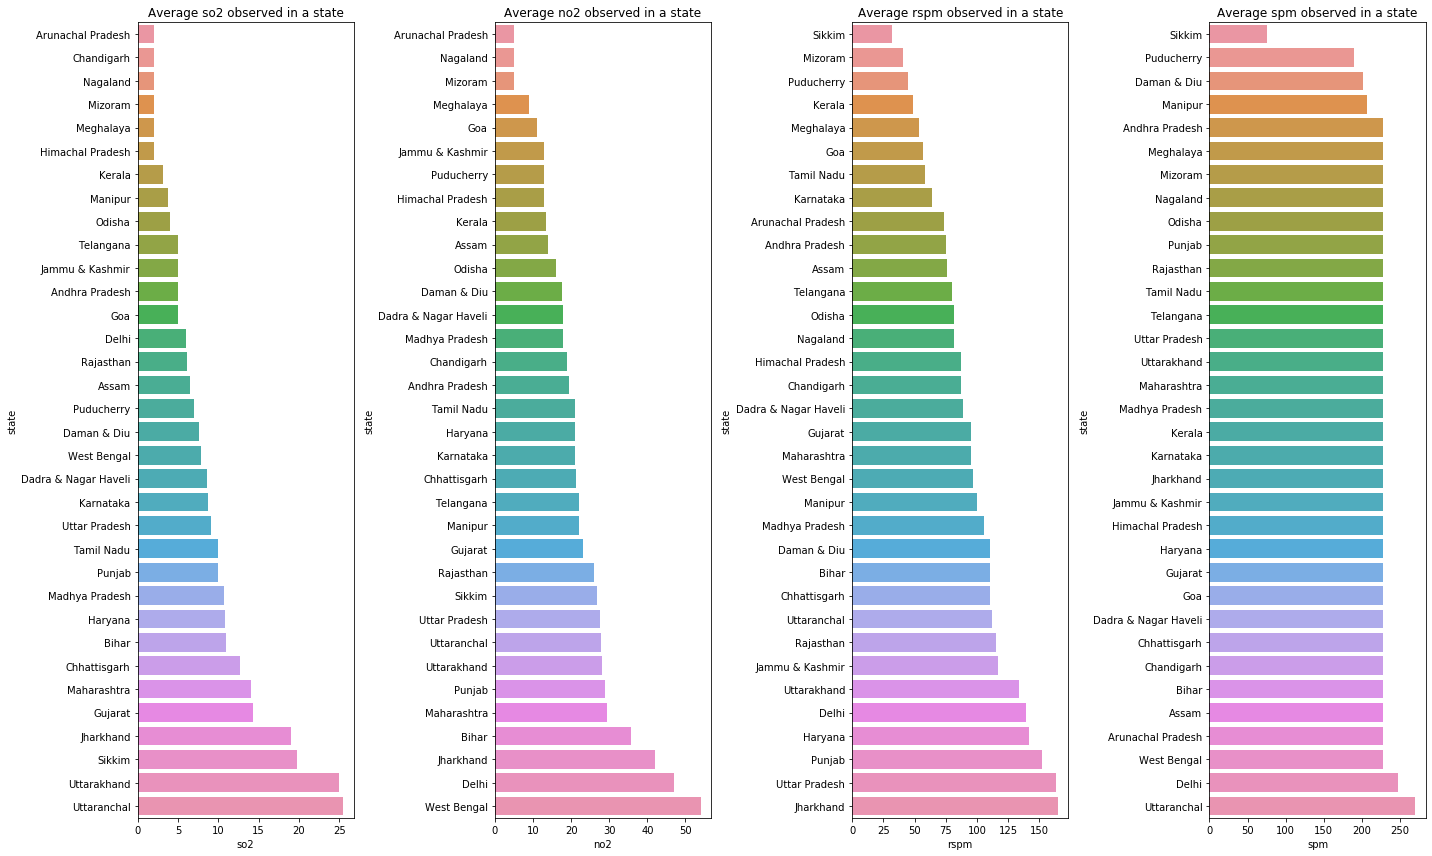

In [13]:
fig, axes= plt.subplots(figsize=(20, 12), ncols=4)
state_wise_max_so2 = dataset[['state','so2']].dropna().groupby('state').median().sort_values(by='so2')
state_wise_max_no2 = dataset[['state','no2']].dropna().groupby('state').median().sort_values(by='no2')
state_wise_max_rspm = dataset[['state','rspm']].dropna().groupby('state').median().sort_values(by='rspm')
state_wise_max_spm = dataset[['state','spm']].dropna().groupby('state').median().sort_values(by='spm')


sns.barplot(x='so2', y=state_wise_max_so2.index, data=state_wise_max_so2, ax=axes[0])
axes[0].set_title("Average so2 observed in a state")

sns.barplot(x='no2', y=state_wise_max_no2.index, data=state_wise_max_no2, ax=axes[1])
axes[1].set_title("Average no2 observed in a state")

sns.barplot(x='rspm', y=state_wise_max_rspm.index, data=state_wise_max_rspm, ax=axes[2])
axes[2].set_title("Average rspm observed in a state")

sns.barplot(x='spm', y=state_wise_max_spm.index, data=state_wise_max_spm, ax=axes[3])
axes[3].set_title("Average spm observed in a state")


plt.tight_layout()

In [ ]:
#Correlation using heatmap

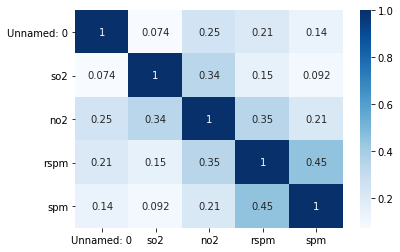

In [14]:
sns.heatmap(dataset.corr(),annot=True,cmap= 'Blues')

In [15]:
# Top 10 most pollutes states

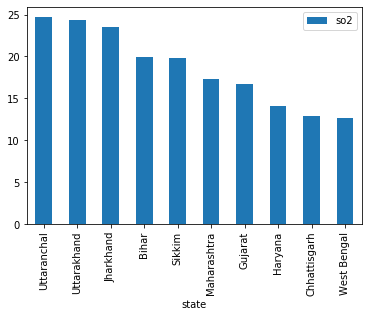

In [16]:
st_wise = dataset.pivot_table(values=['so2','no2','rspm','spm'],index='state').fillna(0)
maxso2 = st_wise.sort_values(by='so2',ascending=False)
maxso2.loc[:,['so2']].head(10).plot(kind='bar')

In [23]:
data=dataset
data['date'] = pd.to_datetime(data['date'])

## Taking only year from date format
data['year'] = data['date'].dt.year
data['year'].unique()

array([1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998.,
       1999., 2000., 2001., 2002., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015., 1987., 1988.,
       1989., 2003.,   nan])

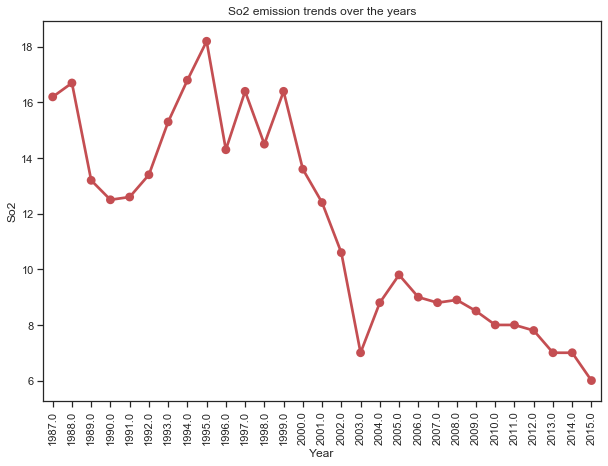

In [24]:
year_groupby = data.groupby(['year']).median().reset_index().sort_values(by = 'year', ascending = False)

# SO2
f,ax = plt.subplots(figsize = (10,7))
plt.xticks(rotation = 90)
sns.pointplot(x = 'year', y = 'so2', data = year_groupby, color= 'r')
plt.xlabel('Year')
plt.ylabel('So2')
plt.title('So2 emission trends over the years')
plt.show()

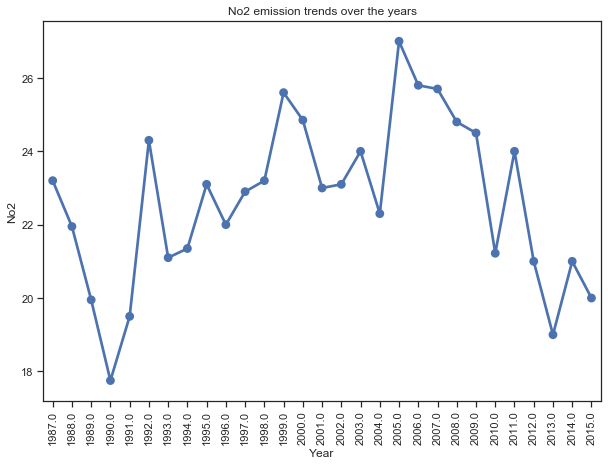

In [25]:
# No2
f,ax = plt.subplots(figsize = (10,7))
plt.xticks(rotation = 90)
sns.pointplot(x = 'year', y = 'no2', data = year_groupby)
plt.xlabel('Year')
plt.ylabel('No2')
plt.title('No2 emission trends over the years')
plt.show()

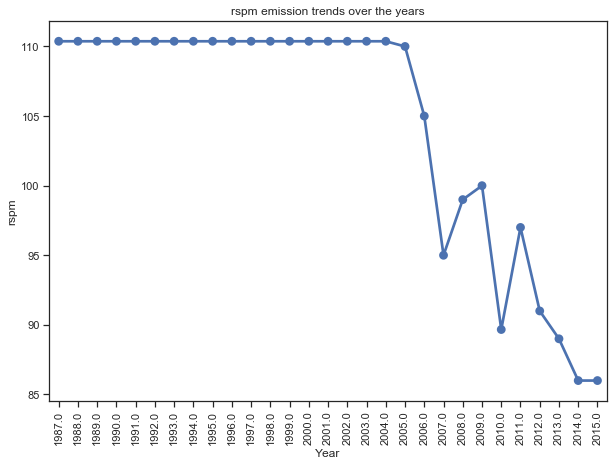

In [26]:
#rspm 
f,ax = plt.subplots(figsize = (10,7))
plt.xticks(rotation = 90)
sns.pointplot(x = 'year', y = 'rspm', data = year_groupby)
plt.xlabel('Year')
plt.ylabel('rspm')
plt.title('rspm emission trends over the years')
plt.show()

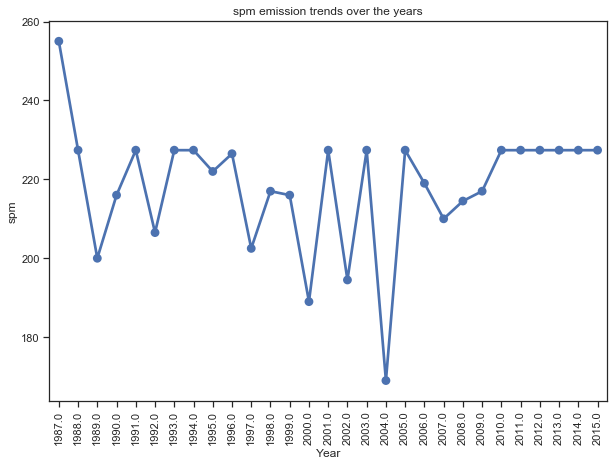

In [27]:
#spm 
f,ax = plt.subplots(figsize = (10,7))
plt.xticks(rotation = 90)
sns.pointplot(x = 'year', y = 'spm', data = year_groupby)
plt.xlabel('Year')
plt.ylabel('spm')
plt.title('spm emission trends over the years')
plt.show()

In [2]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [3]:
df = pd.read_csv('preprocessed.csv',encoding='cp1252', parse_dates=['date'])
df.head()

,Unnamed: 0,state,location,type,so2,no2,rspm,spm,date
0,0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,110.372334,227.394736,1990-01-02
1,1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,110.372334,227.394736,1990-01-02
2,2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,110.372334,227.394736,1990-01-02
3,3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,110.372334,227.394736,1990-01-03
4,4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,110.372334,227.394736,1990-01-03
